In [20]:
import numpy as np 
# 导入pandas包
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [21]:
# 读取五大人格测试数据并清洗
df = pd.read_csv('../data/data-final.csv', delimiter='\t')
#print(df.head())
df = df.dropna()
df = df[(df!=0).all(axis=1)]
df.drop(['introelapse', 'testelapse', 'endelapse', 'dateload','lat_appx_lots_of_err','long_appx_lots_of_err','IPC','screenh','screenw'],axis=1,inplace= True)
print(df.head())

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN2_E  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...  4067.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...  4985.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...  1470.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...  6665.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...  3510.0   

    OPN3_E  OPN4_E  OPN5_E  OPN6_E  OPN7_E  OPN8_E   OPN9_E  OPN10_E  country  
0   2959.0  3411.0  2170.0  4920.0  4436.0  3116.0   2992.0   4354.0       GB  
1   1684.0  3026.0  4742.0  3336.0  2718.0  3374.0   3096.0   3019.0       MY  
2   1644.0  1683.0  2229.0  8114.0  2043.0  6295.0   1585.0   2529.0       GB  
3   1977.0  3728.0  4128.0  3776.0  2984.0  4192.0   3480.0   3257.0       GB  
4  17042.0  7029.0  2327.0  5835.0  6846.0  5320.0  11401.0   8642.0       KE  

[5 rows x 101 columns]


In [22]:
#k-means数据构建
df2 = df.iloc[:,0:50]
df3 = df2.copy()
print(df2.head())

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN1  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   5.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   1.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   5.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   4.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   5.0   

   OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0  
1   2.0   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0  
2   1.0   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0  
3   2.0   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0  
4   1.0   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0  

[5 rows x 50 columns]


In [23]:
#模型构建
from sklearn.cluster import KMeans
'''
class MyKMeans:
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.labels_ = None

    def fit(self, df):  
        X = df.values  # 获取 DataFrame 的数值部分
        self.labels_ = np.zeros(X.shape[0])
        # random chose point
        centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # get all distances between samples and centers
            distances = np.linalg.norm(X - centers[:, np.newaxis], axis=2)

            new_labels = np.argmin(distances, axis=0)

            new_centers = np.array([X[new_labels == j].mean(axis=0) for j in range(self.n_clusters)])

            if np.linalg.norm(new_centers - centers) < self.tol:
                break

            centers = new_centers
            self.labels_ = new_labels

        return self
'''
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df2)
predictions = k_fit.labels_
df2['Clusters'] = predictions 
print(df2.head())

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   1.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   2.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   1.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   2.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   1.0   

   OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  Clusters  
0   4.0   1.0   4.0   1.0   5.0   3.0   4.0    5.0         1  
1   4.0   2.0   3.0   1.0   4.0   2.0   5.0    3.0         0  
2   2.0   1.0   4.0   2.0   5.0   3.0   4.0    4.0         0  
3   5.0   2.0   3.0   1.0   4.0   4.0   3.0    3.0         3  
4   5.0   1.0   5.0   1.0   5.0   3.0   5.0    5.0         1  

[5 rows x 51 columns]


In [24]:
#分组显示结果
Clu_nums = df2['Clusters'].value_counts()
print(Clu_nums)
df2['score_sum']=df.iloc[:,0:50].sum(axis=1)
print(df2.groupby('Clusters')['score_sum'].mean())

df2['EXT_sum']=df.iloc[:,0:10].sum(axis=1)
df2['EST_sum']=df.iloc[:,10:20].sum(axis=1)
df2['AGR_sum']=df.iloc[:,20:30].sum(axis=1)
df2['CSN_sum']=df.iloc[:,30:40].sum(axis=1)
df2['OPN_sum']=df.iloc[:,40:50].sum(axis=1)
print(df2.head())

EXT_sum = df2.groupby('Clusters')['EXT_sum'].mean()/10
EST_sum = df2.groupby('Clusters')['EST_sum'].mean()/10
AGR_sum = df2.groupby('Clusters')['AGR_sum'].mean()/10
CSN_sum = df2.groupby('Clusters')['CSN_sum'].mean()/10
OPN_sum = df2.groupby('Clusters')['OPN_sum'].mean()/10
Clus_5 = {'Clusters':EXT_sum.index,'EXT_s':EXT_sum.values,'EST_s':EST_sum.values,'AGR_s':AGR_sum.values,'CSN_s':CSN_sum.values,'OPN_s':OPN_sum.values}
df_Clus_5 = pd.DataFrame(Clus_5)
print(df_Clus_5)

Clusters
4    191815
0    181068
1    179575
2    170543
3    143283
Name: count, dtype: int64
Clusters
0    156.318101
1    151.800407
2    162.273216
3    148.670275
4    164.044022
Name: score_sum, dtype: float64
   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN8  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   3.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   2.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   3.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   4.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   3.0   

   OPN9  OPN10  Clusters  score_sum  EXT_sum  EST_sum  AGR_sum  CSN_sum  \
0   4.0    5.0         1      150.0     30.0     24.0     31.0     32.0   
1   5.0    3.0         0      145.0     34.0     21.0     32.0     31.0   
2   4.0    4.0         0      142.0     29.0     26.0     28.0     28.0   
3   3.0    3.0       

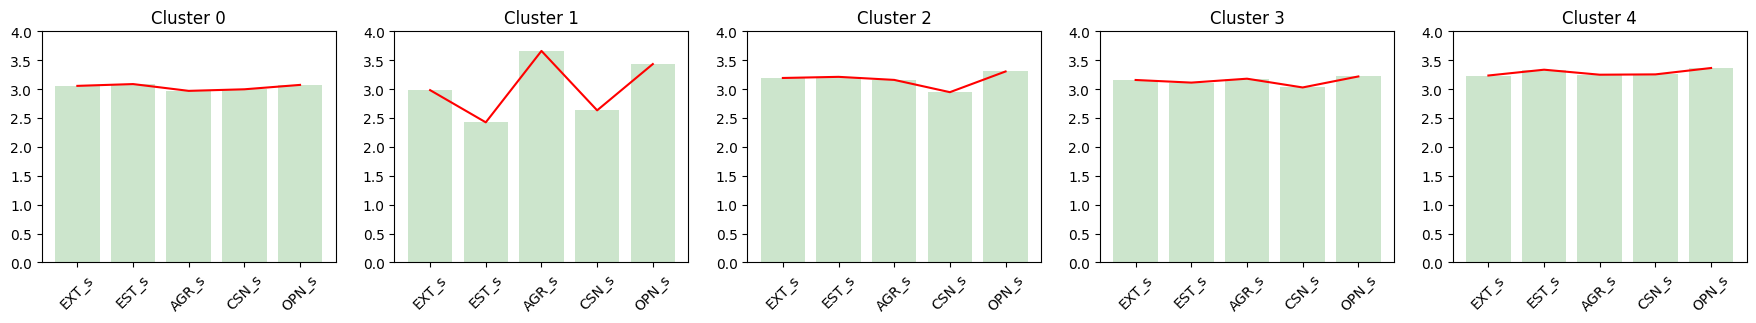

In [25]:
dataclusters = df_Clus_5.groupby('Clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

plt.show()

       PCA1      PCA2  Clusters
0 -5.464978 -1.626895         1
1  0.337007  3.294169         0
2 -0.549081  2.199559         0
3  1.162027 -0.179623         3
4 -4.658147  3.407768         1


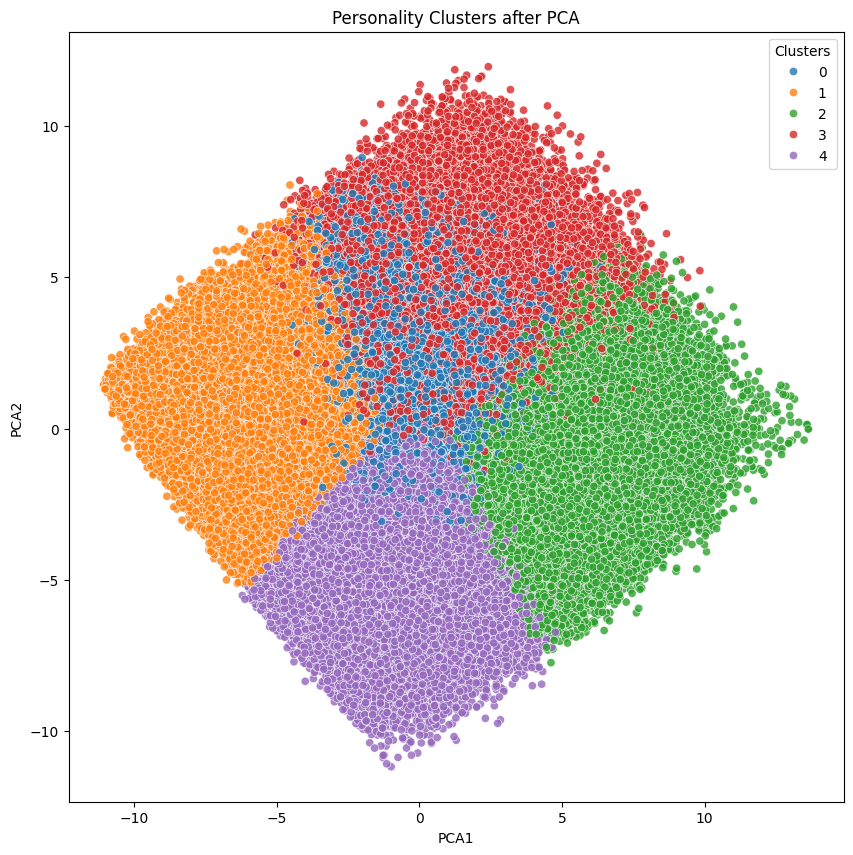

In [26]:
#二维可视化聚类结果
from sklearn.decomposition import PCA
'''
class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit_transform(self, df):
        X = df.values
        # 计算均值
        mean = np.mean(X, axis=0)
        # 去中心化
        X_centered = X - mean

        # 计算协方差矩阵
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # 计算特征值和特征向量
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # 选取前 n 个特征向量
        top_eigenvectors = eigenvectors[:, :self.n_components]

        # 进行变换
        transformed = np.dot(X_centered, top_eigenvectors)

        return transformed
'''
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df3)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
print(df_pca.head())

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA');
plt.show()

In [27]:
#通过导入个人数据预测自己的人格类型
'''
my_data = pd.read_excel('my_personality.xlsx')
my_personality = k_fit.predict(my_data)
print('我的个性分类: ', my_personality)
'''

"\nmy_data = pd.read_excel('my_personality.xlsx')\nmy_personality = k_fit.predict(my_data)\nprint('我的个性分类: ', my_personality)\n"